In [3]:
#Step 1: Data Preparation

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Load the Diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Explore the dataset
print("Feature names:", X.columns.tolist())
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print(X.head())
print(y.describe())

# Check for missing values
print("Missing values:\n", X.isnull().sum())

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Shape of X: (442, 10)
Shape of y: (442,)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64
Missing values:
 age    0
sex    0
b

Linear Regression with BMI:
MAE: 52.26, MSE: 4061.83, RMSE: 63.73, R²: 0.23


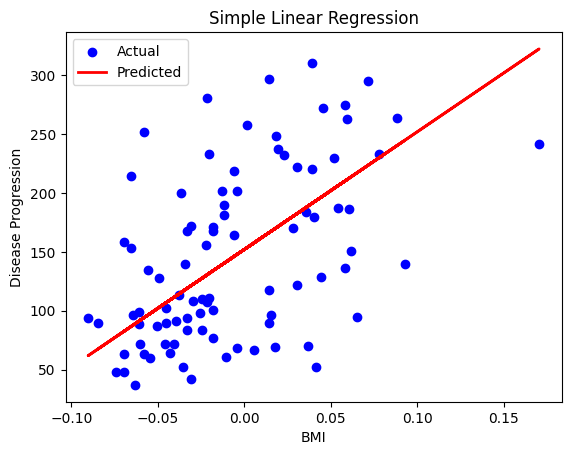

In [4]:
#Step 2: Simple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use BMI as the single feature
X_bmi = X[['bmi']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression with BMI:\nMAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

Multiple Regression:
MAE: 42.79, MSE: 2900.19, RMSE: 53.85, R²: 0.45


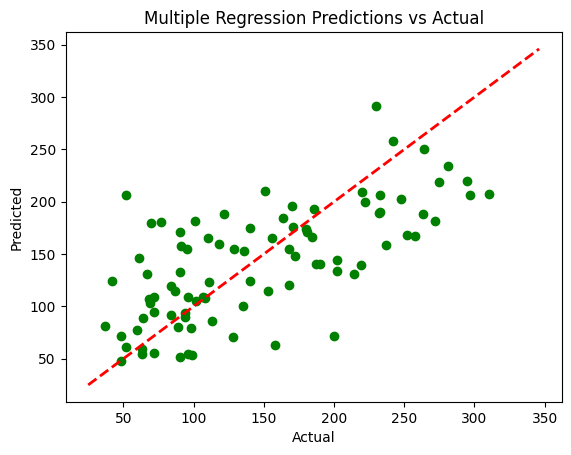

In [5]:
#Step 3: Multiple Regression

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multiple Regression
mr = LinearRegression()
mr.fit(X_train, y_train)
y_pred = mr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Multiple Regression:\nMAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualization: predicted vs actual
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Regression Predictions vs Actual')
plt.show()


In [6]:
#Step 4: Polynomial Regression

# Polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_bmi)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train Polynomial Regression
pr = LinearRegression()
pr.fit(X_train, y_train)
y_pred = pr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Regression (Degree 2):\nMAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


Polynomial Regression (Degree 2):
MAE: 52.38, MSE: 4085.03, RMSE: 63.91, R²: 0.23


In [7]:
#Step 5: Regularization (Ridge and Lasso Regression)

from sklearn.linear_model import Ridge, Lasso

# Standardize features for regularization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Ridge
print("Ridge Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R²:", r2_score(y_test, y_pred_ridge))

# Evaluate Lasso
print("\nLasso Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R²:", r2_score(y_test, y_pred_lasso))


Ridge Regression Performance:
MAE: 42.811674543794396
MSE: 2892.030116179552
RMSE: 53.77759864645829
R²: 0.454143585640167

Lasso Regression Performance:
MAE: 42.80483703876011
MSE: 2884.553106763632
RMSE: 53.70803577458062
R²: 0.4555548342738086
